In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl 
import seaborn as sns
url_red= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red=pd.read_csv(url_red, sep=';')
white=pd.read_csv(url_white, sep=';')
red_df= pd.DataFrame(red)
white_df= pd.DataFrame(white)

In [98]:
red_df['quality label']=red_df['quality'].apply(lambda x: 'low quality' if x<=5 else 'high quality' if x >=8 else "medium quality")
red_df['wine type']= 'red'
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label,wine type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low quality,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low quality,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low quality,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium quality,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low quality,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low quality,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium quality,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium quality,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low quality,red


In [99]:
white_df['quality label']=white_df['quality'].apply(lambda x: 'low quality' if x<=5 else 'high quality' if x >=8 else "medium quality")
white_df['wine type']= 'white'
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium quality,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium quality,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium quality,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium quality,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium quality,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low quality,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium quality,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium quality,white


In [100]:
wines_df= pd.concat([red_df, white_df])
wines_df['quality label']= pd.Categorical(wines_df['quality label'], categories=['low quality','medium quality','high quality'])

In [101]:
wines_df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality label           category
wine type                 object
dtype: object

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import model_evaluation_utils as meu

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [8]:
#Part 1: Predicting wine types

#LOGISTIC REGRESSION

#Dividing between X and y
X= wines_df.iloc[:,0:11]
y= wines_df['wine type']

#--> apply standard scaler or minmax
#scaling= StandardScaler()
#scaling.fit_transform(wines_df.iloc[:,0:12])
#wines_df
#splitting in stratified sampling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.1, random_state=1)
#it splits it randomly

lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=1, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr.score(X_train, y_train)
#With .1: .9794 <-- 
#With .2: .
#With .3: .
#With .4: .
#With .5: .
#With .6: .
#With .7: .
#With .8: .
#With .9: .

0.9796476825722593

In [10]:
lr.score(X_test, y_test)
#With .1: .98 <--
#With .2: .
#With .3: .
#With .4: .
#With .5: .
#With .6: .
#With .7: .
#With .8: .
#With .9: .

0.98

In [11]:
#Doing cross-validation

from sklearn.model_selection import cross_val_score

accuracy= cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10)
accuracy.mean()
#insert kappa score here

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9813569839597237

In [12]:
from sklearn.metrics import cohen_kappa_score as kappa
pred= lr.predict(X_test)
kappa(pred, y_test)

0.9397246593908267

In [105]:
#Part 2: Predicting Wine Quality; 

# A) RANDOM FOREST- Normal

#Taking quality as the y variables
X= wines_df.iloc[:,0:11]
y= wines_df['quality']

#--> apply standard scaler or minmax
#splitting in stratified sampling 
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.1, random_state=1)
#it splits it randomly

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6953846153846154

In [ ]:
rf.score(X_train, y_train)

1.0

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
accuracy_rf= cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10)
accuracy_rf.mean()

0.6873618428755416

In [110]:
from sklearn.model_selection import StratifiedKFold

In [114]:
y_train = y_train.astype('category')

In [125]:
clf = RandomForestClassifier(random_state=1)
cv = StratifiedKFold(random_state=1)       
s = cross_val_score(clf, X_train,y_train, cv=cv)
s.mean()

0.6738477623507564

In [122]:
s

array([0.68290598, 0.67692308, 0.64841745, 0.68006843, 0.68092387])

In [ ]:
pred_rf= rf.predict(X_test)
kappa(pred_rf, y_test)

0.5098094667104067

In [ ]:
# B) KNN- Normal

#--> apply standard scaler or minmax
#scaling= StandardScaler()
#scaling.fit_transform(wines_df.iloc[:,0:12])
#wines_df
#splitting in stratified sampling 
from sklearn.neighbors import KNeighborsClassifier as knn

knn_test= knn(n_neighbors=3)
knn_test.fit(X_train, y_train)
knn_test.score(X_test, y_test)

0.46

In [ ]:
knn_test.score(X_train, y_train)

0.7403796818881477

In [ ]:
pred_knn= knn_test.predict(X_test)
kappa(pred_knn, y_test)

0.17713209888120274

In [ ]:
# A) RANDOM FOREST- With Standard Scalar

#Taking quality as the y variables
X= wines_df.iloc[:,0:11]
y= wines_df['quality']

#--> apply standard scaler or minmax
scaler = StandardScaler()
X = np.array(X)
scaler.fit(X)
X = scaler.transform(X)

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.1, random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))
print(cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10).mean())
pred=rf.predict(X_test)
kappa(pred, y_test)

0.7061538461538461
1.0
0.687705772157827


0.5324920826790482

In [ ]:
# A) RANDOM FOREST- With MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = np.array(X)
scaler.fit(X)
X = scaler.transform(X)

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.1, random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))
print(cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10).mean())
pred=rf.predict(X_test)
kappa(pred, y_test)

0.7046153846153846
1.0
0.6842814073293525


0.5294383801821164

In [84]:
price= pd.read_csv(r'/content/wine_sales_data.csv')
price_df= pd.DataFrame(price)
price_df.head(10)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [85]:
price_df.shape

(150930, 11)

In [86]:
198/ 396

0.5

In [87]:
price_df= price_df[price_df["country"]=='Portugal']
price_df= price_df[price_df["province"]=='Vinho Verde']


In [88]:
price_df= price_df.drop(['Unnamed: 0', 'country', 'description', 'designation', 'province', 'region_1', 'region_2', 'variety','winery'], axis=1)


In [89]:
price_df

,points,price
277,92,35.0
993,85,10.0
994,85,9.0
1378,91,NaN
1558,84,10.0
...,...,...
141129,83,9.0
141143,82,8.0
141148,82,6.0
143472,86,9.0


In [90]:
price_df['price'].isnull().sum()

86

In [77]:
price_df.describe()

,points,price
count,396.000000,310.000000
mean,86.409091,11.400000
std,2.491366,4.821205
min,80.000000,5.000000
25%,85.000000,8.000000
50%,86.000000,10.000000
75%,88.000000,13.000000
max,92.000000,45.000000


In [93]:
Q1 = price_df.price.quantile(0.25)
Q3 = price_df.price.quantile(0.75)

In [94]:
Q1

8.0

In [95]:
Q3

13.0

In [91]:
price_df = price_df.dropna()

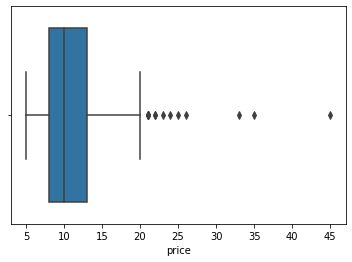

In [96]:
sns.boxplot(x=price_df['price']);

In [47]:
price_df= price_df[(price_df['price']>=8) & (price_df['price']<=20)]


In [48]:
price_df.shape

(198, 11)

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

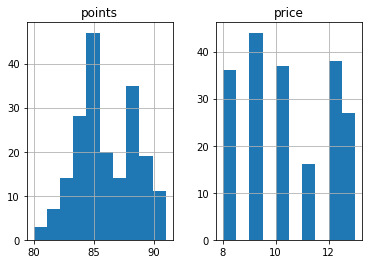

In [ ]:
price_df.hist()

<AxesSubplot:xlabel='price'>

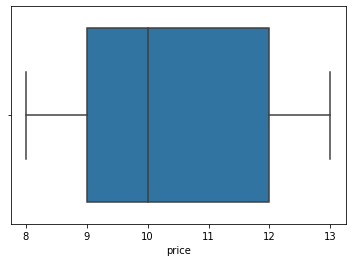

In [ ]:
sns.boxplot(x=price_df['price'])

<AxesSubplot:xlabel='points'>

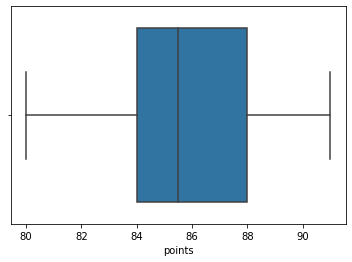

In [ ]:
sns.boxplot(x=price_df['points'])

In [40]:
bins = [3, 4, 5,6, 7, 8, 9]
price_df['points'] = pd.cut(price_df['points'], bins =7, labels=bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
price_df.groupby(by='points').describe()

price                                                   
       count       mean       std   min   25%   50%   75%   max
points                                                         
3        3.0   8.000000  0.000000   8.0   8.0   8.0   8.0   8.0
4       21.0   8.952381  0.864650   8.0   8.0   9.0  10.0  10.0
5       28.0   9.500000  1.666667   8.0   8.0   9.0  10.0  13.0
6       70.0  10.242857  1.739863   8.0   9.0  10.0  11.0  16.0
7       19.0  12.631579  1.570935  10.0  12.0  12.0  13.5  15.0
8       63.0  11.730159  2.294498   8.0  10.0  12.0  13.0  17.0
9       29.0  14.000000  2.645751   9.0  12.0  15.0  16.0  17.0

In [64]:
price_df= price_df[(price_df['price']>=7) & (price_df['price']<=17)]


In [65]:
price_df.shape

(254, 2)

In [69]:
310*0.2

62.0

In [66]:
bins = [3, 4, 5,6, 7, 8, 9]
price_df['points'] = pd.cut(price_df['points'], bins =7, labels=bins)
price_df.groupby(by='points').describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


price                                                   
       count       mean       std  min   25%   50%    75%   max
points                                                         
3        3.0   8.000000  0.000000  8.0   8.0   8.0   8.00   8.0
4       23.0   8.782609  0.998022  7.0   8.0   9.0  10.00  10.0
5       34.0   9.058824  1.791244  7.0   8.0   9.0  10.00  13.0
6       82.0   9.768293  1.977021  7.0   8.0  10.0  11.00  16.0
7       20.0  12.350000  1.980829  7.0  12.0  12.0  13.25  15.0
8       63.0  11.730159  2.294498  8.0  10.0  12.0  13.00  17.0
9       29.0  14.000000  2.645751  9.0  12.0  15.0  16.00  17.0

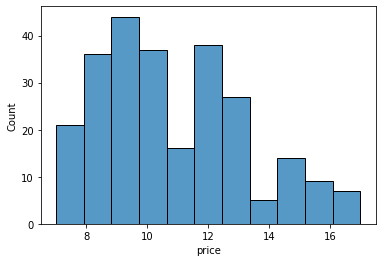

In [68]:
sns.histplot(price_df.price, bins = )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76fd911e50>]],
      dtype=object)

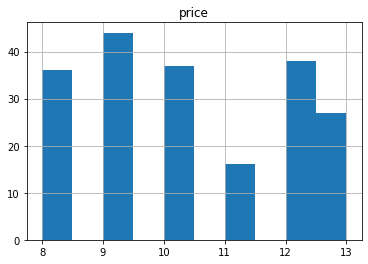

In [53]:
price_df.hist()

In [ ]:
price_df

,points,price
993,6,10.0
994,6,9.0
1558,5,10.0
1559,5,10.0
1694,8,12.0
...,...,...
140222,6,12.0
140230,5,9.0
141129,4,9.0
141143,4,8.0
